In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn

In [2]:
def load_data(path):
    df = pd.read_csv(path)
    df.drop(df.columns[0], axis = 1, inplace=True)
    return df 

df = load_data("../data/autodf.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Correlation

In [4]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


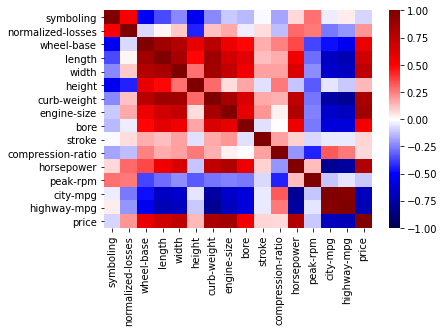

In [5]:
ax = sns.heatmap(df.corr(), vmin= -1, vmax=1, cmap='seismic')

# Histograms

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

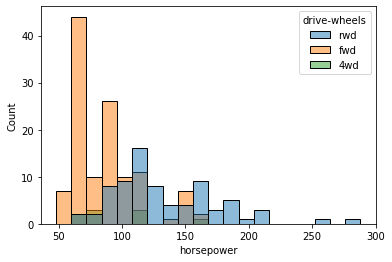

In [6]:
sns.histplot(df[['horsepower','drive-wheels']],x='horsepower',bins=20,hue='drive-wheels')

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

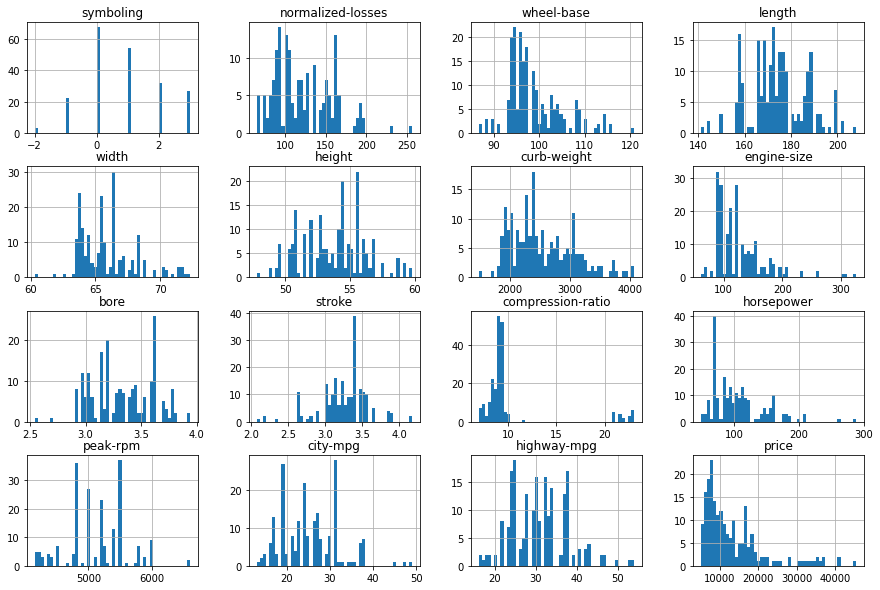

In [7]:
df.hist(figsize=(15,10),bins=50)

In [8]:
df_r = df[['drive-wheels','horsepower','engine-size','length','width','height','curb-weight','city-mpg']]
df_r

,drive-wheels,horsepower,engine-size,length,width,height,curb-weight,city-mpg
0,rwd,111.0,130,168.8,64.1,48.8,2548,21
1,rwd,111.0,130,168.8,64.1,48.8,2548,21
2,rwd,154.0,152,171.2,65.5,52.4,2823,19
3,fwd,102.0,109,176.6,66.2,54.3,2337,24
4,4wd,115.0,136,176.6,66.4,54.3,2824,18
...,...,...,...,...,...,...,...,...
200,rwd,114.0,141,188.8,68.9,55.5,2952,23
201,rwd,160.0,141,188.8,68.8,55.5,3049,19
202,rwd,134.0,173,188.8,68.9,55.5,3012,18
203,rwd,106.0,145,188.8,68.9,55.5,3217,26


In [9]:
y = df_r['city-mpg'].values
df_r = df_r.drop('city-mpg',axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder

dw_cat = df_r['drive-wheels']

dw_cat.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [11]:
encoder = LabelEncoder()
dw_cat_encoded = encoder.fit_transform(dw_cat)
dw_cat_encoded

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [12]:
print(encoder.classes_)

['4wd' 'fwd' 'rwd']


In [13]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
dw_onehot_encoded = onehot_encoder.fit_transform(dw_cat_encoded.reshape(-1,1))
dw_onehot_encoded

<205x3 sparse matrix of type '<class 'numpy.float64'>'
	with 205 stored elements in Compressed Sparse Row format>

In [14]:
dw_onehot_encoded.toarray()[0:10,:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [15]:
from sklearn.preprocessing import LabelBinarizer

lb_encoder = LabelBinarizer()
dw_lb_encoded = lb_encoder.fit_transform(dw_cat)
print()
dw_lb_encoded[0:10,:]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [16]:
df_r_encoded = pd.concat([df_r,pd.DataFrame(data=dw_lb_encoded,columns=lb_encoder.classes_)],axis=1)
df_r_encoded.head()

,drive-wheels,horsepower,engine-size,length,width,height,curb-weight,4wd,fwd,rwd
0,rwd,111.0,130,168.8,64.1,48.8,2548,0,0,1
1,rwd,111.0,130,168.8,64.1,48.8,2548,0,0,1
2,rwd,154.0,152,171.2,65.5,52.4,2823,0,0,1
3,fwd,102.0,109,176.6,66.2,54.3,2337,0,1,0
4,4wd,115.0,136,176.6,66.4,54.3,2824,1,0,0


In [17]:
df_r_encoded.drop('drive-wheels',axis=1,inplace=True)
df_r_encoded.head()

,horsepower,engine-size,length,width,height,curb-weight,4wd,fwd,rwd
0,111.0,130,168.8,64.1,48.8,2548,0,0,1
1,111.0,130,168.8,64.1,48.8,2548,0,0,1
2,154.0,152,171.2,65.5,52.4,2823,0,0,1
3,102.0,109,176.6,66.2,54.3,2337,0,1,0
4,115.0,136,176.6,66.4,54.3,2824,1,0,0


# Imputation

In [18]:
df_r_encoded.loc[0:5,'horsepower'] = np.nan
df_r_encoded

,horsepower,engine-size,length,width,height,curb-weight,4wd,fwd,rwd
0,NaN,130,168.8,64.1,48.8,2548,0,0,1
1,NaN,130,168.8,64.1,48.8,2548,0,0,1
2,NaN,152,171.2,65.5,52.4,2823,0,0,1
3,NaN,109,176.6,66.2,54.3,2337,0,1,0
4,NaN,136,176.6,66.4,54.3,2824,1,0,0
...,...,...,...,...,...,...,...,...,...
200,114.0,141,188.8,68.9,55.5,2952,0,0,1
201,160.0,141,188.8,68.8,55.5,3049,0,0,1
202,134.0,173,188.8,68.9,55.5,3012,0,0,1
203,106.0,145,188.8,68.9,55.5,3217,0,0,1


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df_r_encoded)

X = imputer.transform(df_r_encoded)

df_r_inputed = pd.DataFrame(X, columns=df_r_encoded.columns,index=df_r_encoded.index)
df_r_inputed

,horsepower,engine-size,length,width,height,curb-weight,4wd,fwd,rwd
0,95.0,130.0,168.8,64.1,48.8,2548.0,0.0,0.0,1.0
1,95.0,130.0,168.8,64.1,48.8,2548.0,0.0,0.0,1.0
2,95.0,152.0,171.2,65.5,52.4,2823.0,0.0,0.0,1.0
3,95.0,109.0,176.6,66.2,54.3,2337.0,0.0,1.0,0.0
4,95.0,136.0,176.6,66.4,54.3,2824.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
200,114.0,141.0,188.8,68.9,55.5,2952.0,0.0,0.0,1.0
201,160.0,141.0,188.8,68.8,55.5,3049.0,0.0,0.0,1.0
202,134.0,173.0,188.8,68.9,55.5,3012.0,0.0,0.0,1.0
203,106.0,145.0,188.8,68.9,55.5,3217.0,0.0,0.0,1.0


# Custom transformers

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

horsepower_idx, engine_size_idx, length_idx, width_idx, height_idx, curb_weight_idx = 0,1,2,3,4,5

class CombineAttributes(BaseEstimator,TransformerMixin):
    """
    """
    def __init__(self,add_volume=False):
        self.add_volume = add_volume
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        hp_to_weight_ratio = X[:,horsepower_idx]/X[:,curb_weight_idx]
        
        if self.add_volume:
            volume = X[:,length_idx]=X[:,width_idx]*X[:,height_idx]
            return np.c_[X,hp_to_weight_ratio,volume]
        else:
            return np.c_[X,hp_to_weight_ratio]
        
combine_attributes = CombineAttributes(add_volume=True)
df_r_combined = combine_attributes.transform(df_r_inputed.values)

In [27]:
print(df_r_combined[0,:])

[9.50000000e+01 1.30000000e+02 3.12808000e+03 6.41000000e+01
 4.88000000e+01 2.54800000e+03 0.00000000e+00 0.00000000e+00
 1.00000000e+00 3.72841444e-02 3.12808000e+03]


# Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_r_combined)
print(scaler.transform(df_r_combined))

[[0.19583333 0.26037736 0.         ... 1.         0.26435413 0.        ]
 [0.19583333 0.26037736 0.         ... 1.         0.26435413 0.        ]
 [0.19583333 0.34339623 0.30456771 ... 1.         0.20901003 0.30456771]
 ...
 [0.35833333 0.42264151 0.69689443 ... 1.         0.37413667 0.69689443]
 [0.24166667 0.31698113 0.69689443 ... 1.         0.19831013 0.69689443]
 [0.275      0.30188679 0.69689443 ... 1.         0.26353775 0.69689443]]


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_r_combined)
df_prepared = scaler.transform(df_r_combined)
print(df_prepared)

[[-0.216776    0.07444893 -1.85385014 ...  1.30283093 -0.26921018
  -1.85385014]
 [-0.216776    0.07444893 -1.85385014 ...  1.30283093 -0.26921018
  -1.85385014]
 [-0.216776    0.60404617 -0.49290339 ...  1.30283093 -0.65166129
  -0.49290339]
 ...
 [ 0.7758495   1.10957081  1.26019042 ...  1.30283093  0.48943349
   1.26019042]
 [ 0.06319529  0.43553795  1.26019042 ...  1.30283093 -0.72560213
   1.26019042]
 [ 0.26681078  0.33924755  1.26019042 ...  1.30283093 -0.27485177
   1.26019042]]


# Split into train and test

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
lin_reg.predict(X_test)

array([17.78094707, 15.09035139, 25.92208201, 23.72060558, 17.04263838,
       31.31350678, 32.83748995, 30.76726426, 25.88437811, 33.70416832,
       23.69417815, 30.56194141, 22.52567424, 26.39080971, 16.21701897,
       32.99172692, 37.21322614, 19.49005069, 26.87901405, 26.02405813,
       27.81129682, 19.46384659, 31.33664877, 33.92994418, 31.28285856,
       17.19169173, 22.94368365, 22.14018606, 31.31849794, 22.56052388,
       18.57317552, 31.29936908, 29.32965865, 20.6737431 , 24.29731338,
       18.42941548, 20.74242989, 24.1081819 , 30.94807506, 19.42991121,
       28.1634237 , 27.67645719, 22.80184381, 32.22115564, 31.46713964,
       27.55628724, 31.29936908, 30.47800496, 21.67804055, 19.48961933,
       30.90310448, 18.26142155, 34.65568067, 26.66623455, 31.33606037,
       25.78067878, 22.94301899, 24.1081819 , 14.15426986, 31.25131135,
       25.19462577, 18.00539455])

In [42]:
from sklearn.metrics import mean_squared_error

y_predicted = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.041023403324926

In [43]:
from sklearn.ensemble import RandomForestRegressor

# use a Random Forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_predicted = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_predicted)
forest_mse = np.sqrt(forest_mse)
forest_mse

3.357495732949514

# Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, df_x, y,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.78203249, 2.75180114, 3.23028783, 1.55015514, 2.78006123,
       3.11377195, 2.07763207, 4.6693763 , 2.38188686, 2.66896984])

In [46]:
rmse_scores.mean()

2.8005974833805842

# Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 12
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # 6
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.8576513910334804 {'max_features': 2, 'n_estimators': 3}
3.3696328235957194 {'max_features': 2, 'n_estimators': 10}
3.188227132643233 {'max_features': 2, 'n_estimators': 30}
3.4558116479839387 {'max_features': 4, 'n_estimators': 3}
3.2146961317536986 {'max_features': 4, 'n_estimators': 10}
3.0287232993207285 {'max_features': 4, 'n_estimators': 30}
3.4987973156252647 {'max_features': 6, 'n_estimators': 3}
3.341500466235739 {'max_features': 6, 'n_estimators': 10}
3.094131362578016 {'max_features': 6, 'n_estimators': 30}
3.8434571158822646 {'max_features': 8, 'n_estimators': 3}
3.6411606297590495 {'max_features': 8, 'n_estimators': 10}
3.3228893213187853 {'max_features': 8, 'n_estimators': 30}
3.39360150361112 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.1301211696331124 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.915336514344428 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.0093674888465896 {'bootstrap': False, 'max_features': 3, 'n_estim

# Randomized Search grid

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=9),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026D831FFC70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026D83223760>},
                   random_state=42, scoring='neg_mean_squared_error')

In [55]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=5, random_state=42)

In [56]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.1509464686023456 {'max_features': 7, 'n_estimators': 180}
3.2591162451172235 {'max_features': 5, 'n_estimators': 15}
3.152753162099624 {'max_features': 3, 'n_estimators': 72}
3.072371732130552 {'max_features': 5, 'n_estimators': 21}
3.1616000456235502 {'max_features': 7, 'n_estimators': 122}
3.1542525138944115 {'max_features': 3, 'n_estimators': 75}
3.1291335542434555 {'max_features': 3, 'n_estimators': 88}
3.061977109566986 {'max_features': 5, 'n_estimators': 100}
3.1562964508111424 {'max_features': 8, 'n_estimators': 152}
3.11136361673713 {'max_features': 3, 'n_estimators': 150}
